In [9]:
import yfinance as yf   # yahoo finance api to download daily stock and index prices

In [10]:
sp500 = yf.Ticker("^GSPC") # download price history of a single symbol GSPC = sp500

In [12]:
sp500 = sp500.history(period = 'max')

In [32]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000
2023-07-19 00:00:00-04:00,4563.870117,4578.430176,4557.479980,4565.720215,4115670000


In [28]:
sp500.index


DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-10 00:00:00-04:00', '2023-07-11 00:00:00-04:00',
               '2023-07-12 00:00:00-04:00', '2023-07-13 00:00:00-04:00',
               '2023-07-14 00:00:00-04:00', '2023-07-17 00:00:00-04:00',
               '2023-07-18 00:00:00-04:00', '2023-07-19 00:00:00-04:00',
               '2023-07-20 00:00:00-04:00', '2023-07-21 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24003, freq=None)

<Axes: xlabel='Date'>

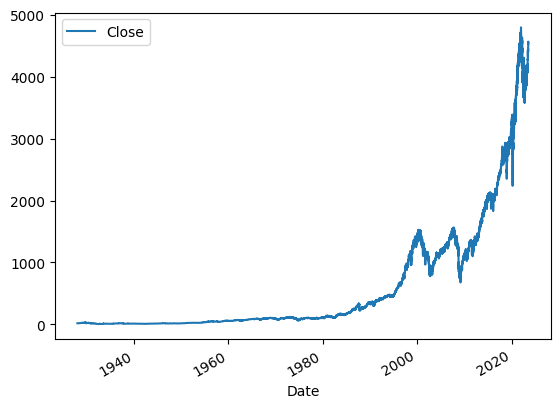

In [30]:
sp500.plot.line(y='Close', use_index=True)

In [31]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [33]:
# add the tomorrow price column into the table
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [36]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000,4554.979980,1
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000,4565.720215,1
2023-07-19 00:00:00-04:00,4563.870117,4578.430176,4557.479980,4565.720215,4115670000,4534.870117,0


In [35]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [38]:
sp500 = sp500.loc["1990-01-01":].copy()

In [39]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000,4554.979980,1
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000,4565.720215,1
2023-07-19 00:00:00-04:00,4563.870117,4578.430176,4557.479980,4565.720215,4115670000,4534.870117,0
